In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
inguzanyo=pd.read_csv('loan_data.csv')

In [3]:
inguzanyo.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


In [4]:
inguzanyo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
credit.policy        9578 non-null int64
purpose              9578 non-null object
int.rate             9578 non-null float64
installment          9578 non-null float64
log.annual.inc       9578 non-null float64
dti                  9578 non-null float64
fico                 9578 non-null int64
days.with.cr.line    9578 non-null float64
revol.bal            9578 non-null int64
revol.util           9578 non-null float64
inq.last.6mths       9578 non-null int64
delinq.2yrs          9578 non-null int64
pub.rec              9578 non-null int64
not.fully.paid       9578 non-null int64
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


In [5]:
inguzanyo.dtypes

credit.policy          int64
purpose               object
int.rate             float64
installment          float64
log.annual.inc       float64
dti                  float64
fico                   int64
days.with.cr.line    float64
revol.bal              int64
revol.util           float64
inq.last.6mths         int64
delinq.2yrs            int64
pub.rec                int64
not.fully.paid         int64
dtype: object

In [6]:
inguzanyo.shape

(9578, 14)

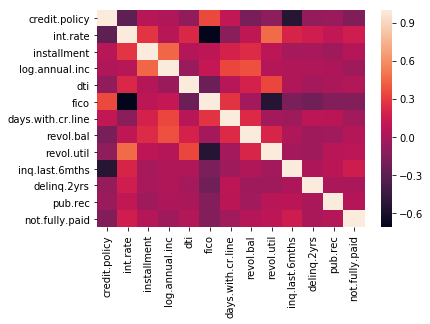

In [7]:
sns.heatmap(inguzanyo.corr())

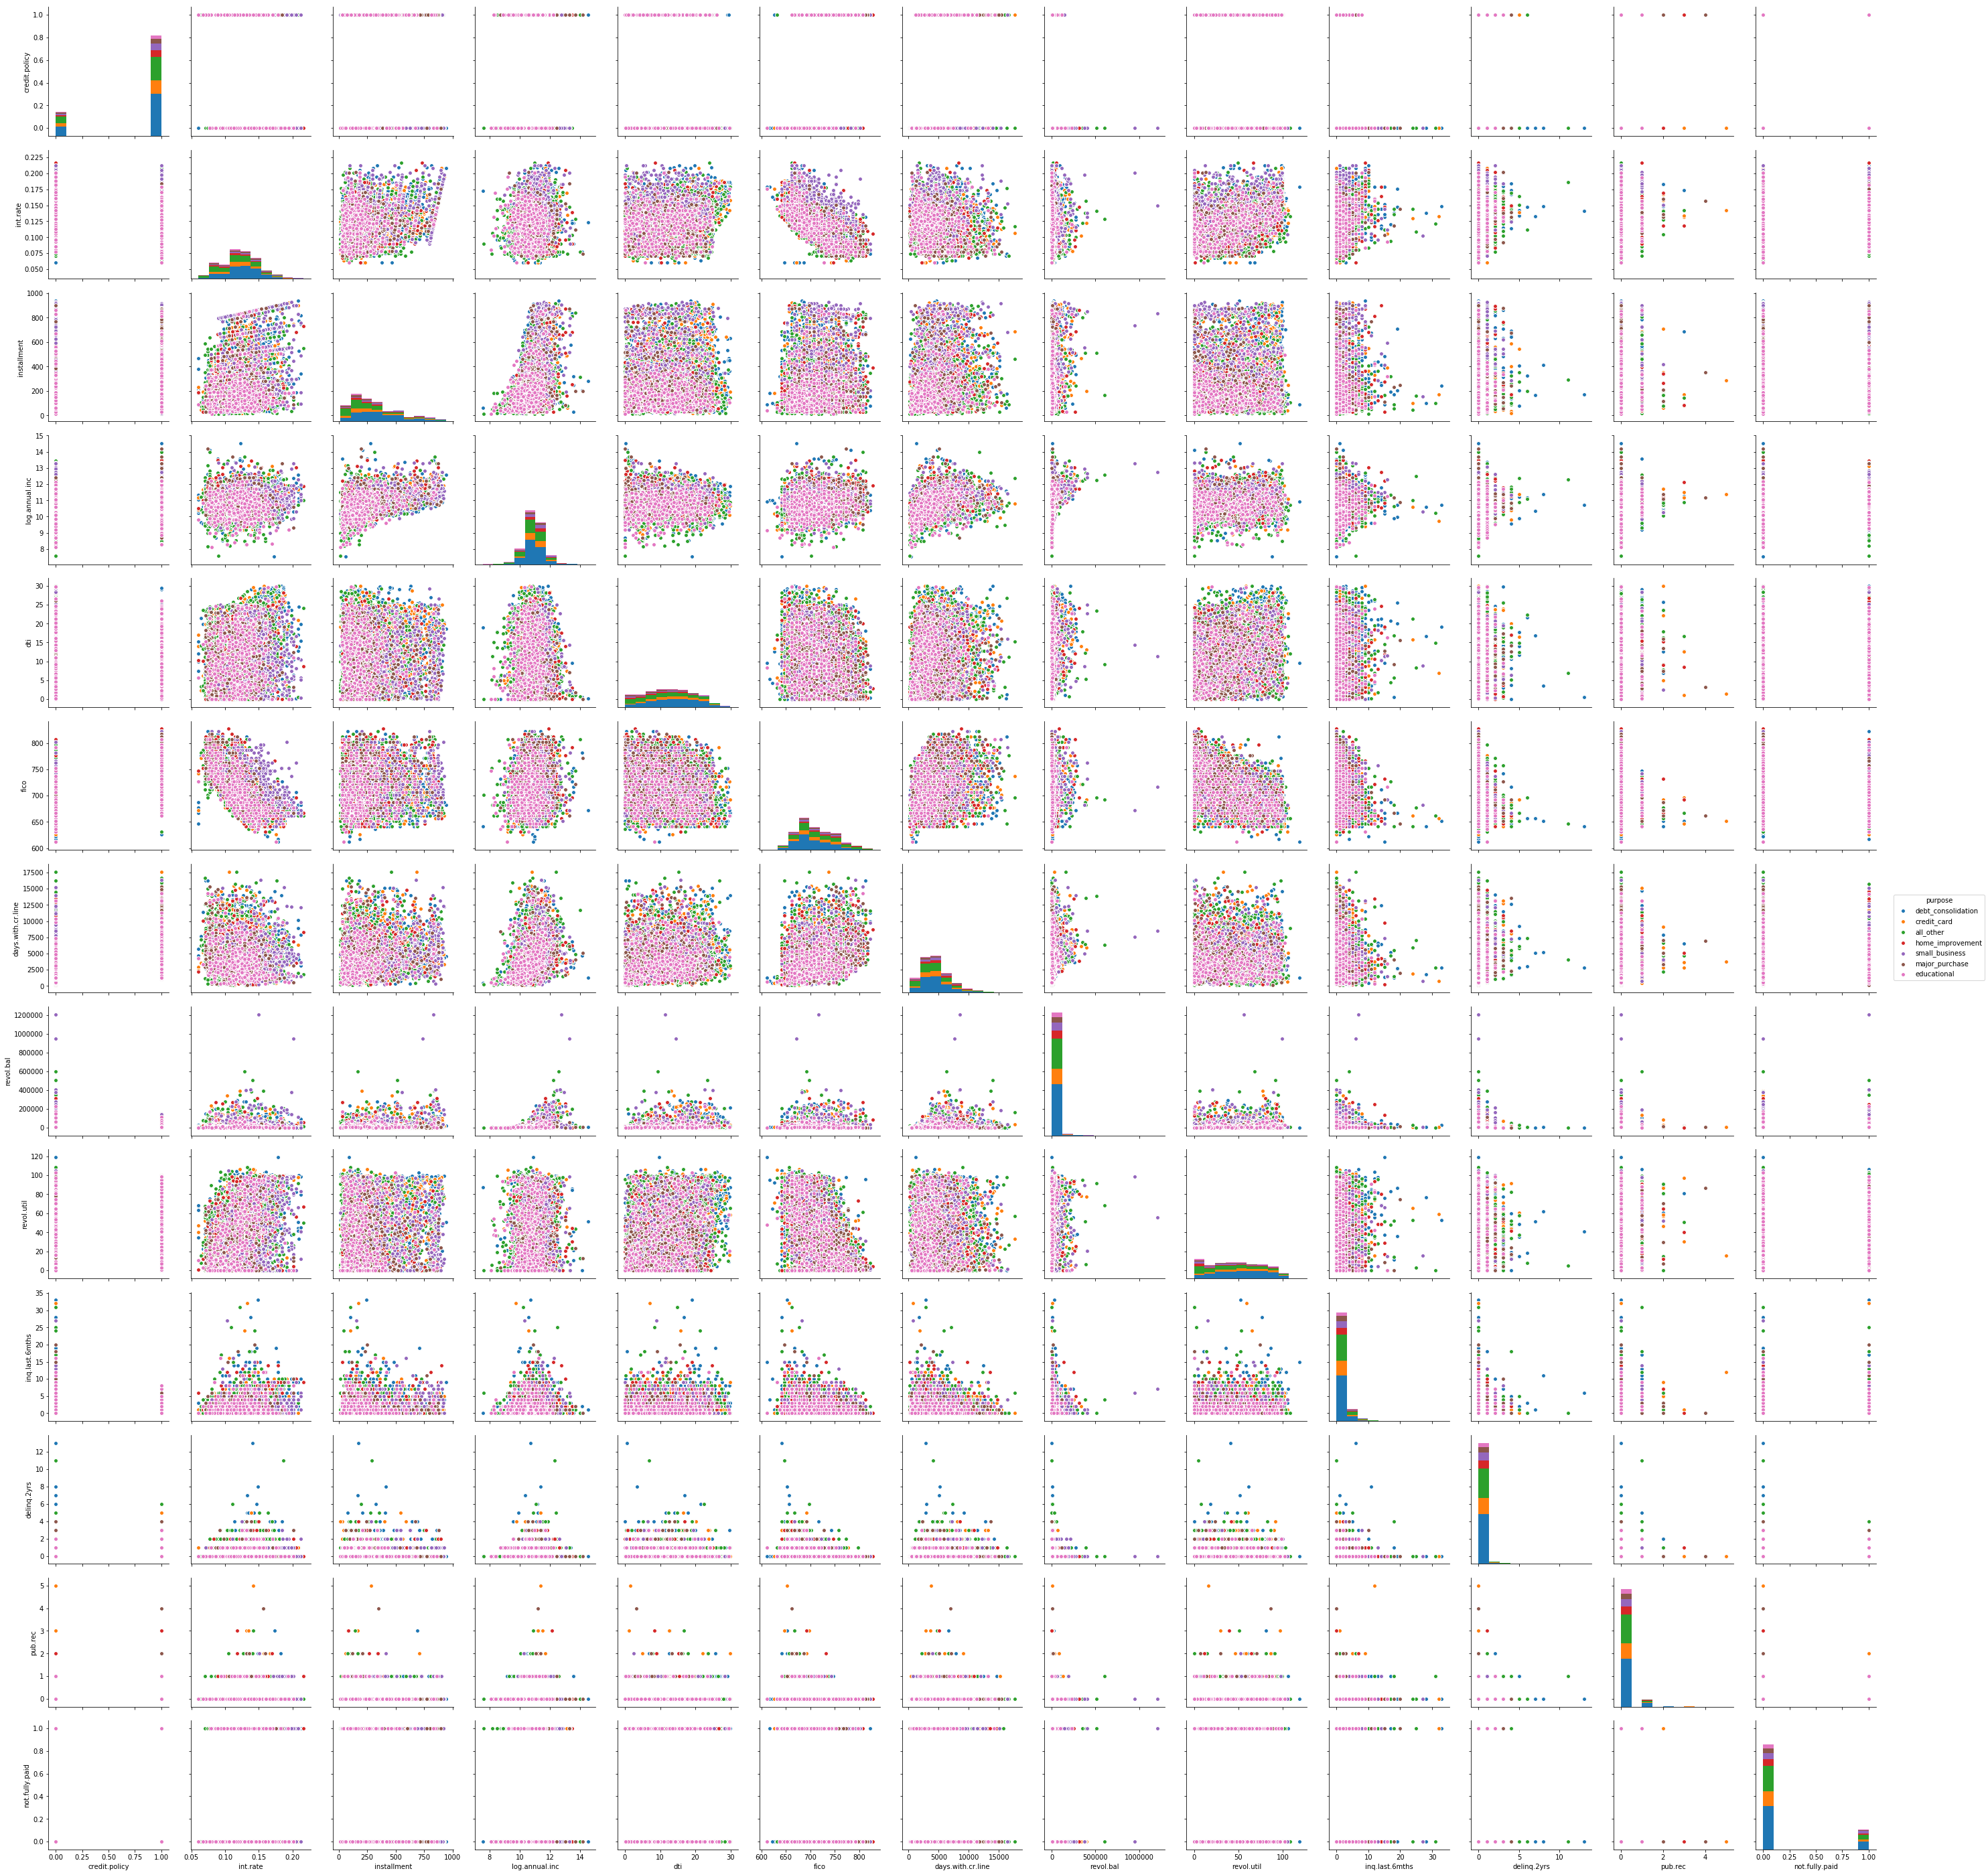

In [8]:
sns.pairplot(inguzanyo,hue='purpose',size=3)

In [9]:
inguzanyo.isnull().sum()

credit.policy        0
purpose              0
int.rate             0
installment          0
log.annual.inc       0
dti                  0
fico                 0
days.with.cr.line    0
revol.bal            0
revol.util           0
inq.last.6mths       0
delinq.2yrs          0
pub.rec              0
not.fully.paid       0
dtype: int64

In [10]:
inguzanyo['purpose'].unique()

array(['debt_consolidation', 'credit_card', 'all_other',
       'home_improvement', 'small_business', 'major_purchase',
       'educational'], dtype=object)

In [11]:
inguzanyo.nunique()

credit.policy           2
purpose                 7
int.rate              249
installment          4788
log.annual.inc       1987
dti                  2529
fico                   44
days.with.cr.line    2687
revol.bal            7869
revol.util           1035
inq.last.6mths         28
delinq.2yrs            11
pub.rec                 6
not.fully.paid          2
dtype: int64

In [12]:
inguzanyo['purpose'].nunique()

7

In [13]:
inguzanyo['not.fully.paid'].unique()

array([0, 1], dtype=int64)

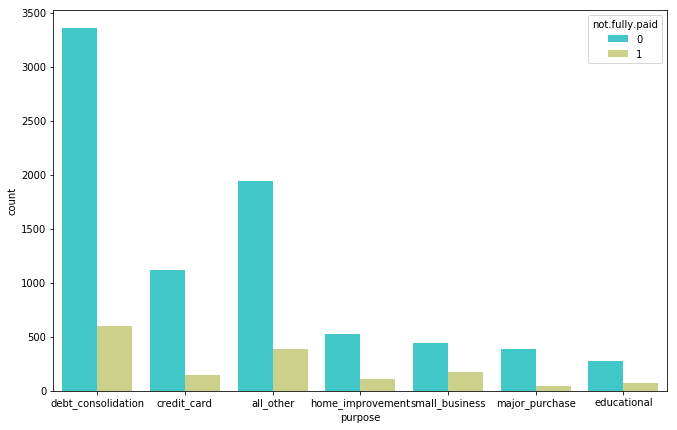

In [14]:
plt.figure(figsize = (11, 7))
sns.countplot(x='purpose', hue='not.fully.paid', data=inguzanyo, palette='rainbow')

plt.show()

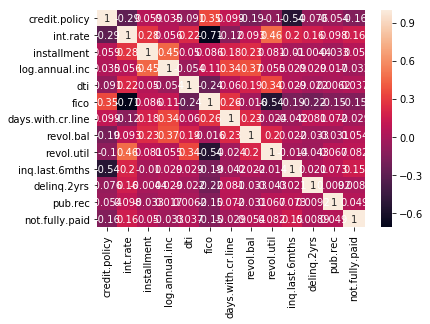

In [15]:
sns.heatmap(inguzanyo.corr(),annot=True)

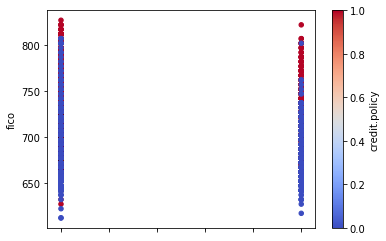

In [16]:
inguzanyo.plot.scatter(y='fico',x='not.fully.paid',c='credit.policy',cmap='coolwarm')

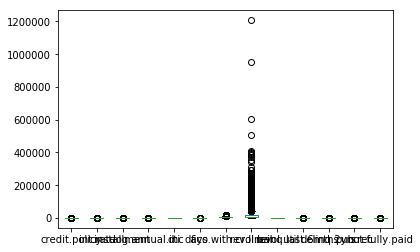

In [17]:
inguzanyo.plot.box()

ValueError: could not convert string to float: 'debt_consolidation'

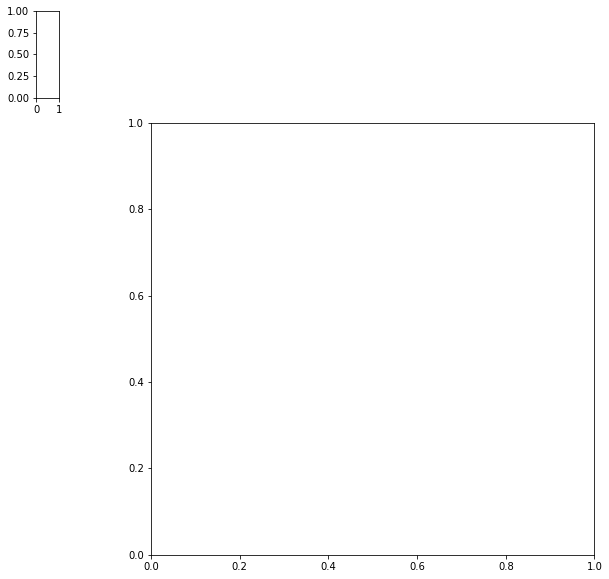

In [18]:
sns.clustermap(inguzanyo)

In [ ]:
#check the relation between credit policy and fico
sns.jointplot(x='credit.policy',y='fico',data=inguzanyo,color='red')

In [ ]:
sns.jointplot(y='credit.policy',x='not.fully.paid',data=inguzanyo,color='red')

In [ ]:
sns.jointplot(x='credit.policy',y='int.rate',data=inguzanyo,color='red')

In [19]:
#remove the categorical variables

kuguza=pd.get_dummies(inguzanyo,columns=['purpose'],drop_first=True)

In [20]:
kuguza.head()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_major_purchase,purpose_small_business
0,1,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0,0,1,0,0,0,0
1,1,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0,1,0,0,0,0,0
2,1,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0,0,1,0,0,0,0
3,1,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0,0,1,0,0,0,0
4,1,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0,1,0,0,0,0,0


In [21]:
from sklearn.model_selection import train_test_split

In [22]:
x=kuguza.drop('not.fully.paid',axis=1)
y=kuguza['not.fully.paid']

In [23]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=100)


In [24]:
from sklearn.linear_model import LogisticRegression

In [25]:
lg=LogisticRegression()

In [26]:
lg.fit(x_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [27]:
x_train.head()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_major_purchase,purpose_small_business
2120,1,0.1189,49.75,10.239817,5.62,752,1560.041667,47,1.6,2,0,0,0,0,0,0,0,0
728,1,0.0976,305.47,11.067638,4.80,717,5070.041667,12226,45.6,0,1,1,1,0,0,0,0,0
1711,1,0.1411,171.15,10.412712,13.77,687,3030.041667,6557,52.9,2,0,0,0,0,0,0,0,1
2757,1,0.1126,312.21,11.184421,3.73,747,2070.000000,700,14.6,7,0,0,0,0,0,0,0,0
4405,1,0.0894,285.95,10.896739,9.38,742,7529.958333,59968,74.6,1,0,0,0,0,0,1,0,0


In [28]:
prediction=lg.predict(x_test)

In [29]:
from sklearn.metrics import classification_report

In [30]:
print(classification_report(y_test,prediction))

             precision    recall  f1-score   support

          0       0.83      1.00      0.91      2392
          1       0.45      0.01      0.02       482

avg / total       0.77      0.83      0.76      2874



In [31]:
predict=pd.DataFrame(prediction)

In [32]:
predict.head()

,0
0,0
1,0
2,0
3,0
4,0


In [33]:
y_test.head(10)

838     0
5231    1
3197    0
3077    0
4827    0
9480    0
8344    0
688     0
8577    1
7526    0
Name: not.fully.paid, dtype: int64

In [34]:
from sklearn.svm import SVC

In [35]:
modo=SVC()

In [36]:
modo.fit(x_train,y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [37]:
predictions=modo.predict(x_test)

In [38]:
from sklearn.metrics import classification_report,confusion_matrix

In [39]:
print(classification_report(y_test,predictions))

             precision    recall  f1-score   support

          0       0.83      1.00      0.91      2392
          1       0.00      0.00      0.00       482

avg / total       0.69      0.83      0.76      2874



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [40]:
print(confusion_matrix(y_test,predictions))

[[2392    0]
 [ 482    0]]


In [41]:
print(classification_report(y_test,predictions))

             precision    recall  f1-score   support

          0       0.83      1.00      0.91      2392
          1       0.00      0.00      0.00       482

avg / total       0.69      0.83      0.76      2874



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [42]:
param_grid = {'C': [0.1,1, 10, 100, 1000], 'gamma': [1,0.1,0.01,0.001,0.0001], 'kernel': ['rbf']} 

In [43]:
from sklearn.model_selection import GridSearchCV

In [44]:
grid=GridSearchCV(SVC(),param_grid,refit=True,verbose=3)

In [45]:
grid.fit(x_train,y_train)

Fitting 3 folds for each of 25 candidates, totalling 75 fits
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV]  C=0.1, gamma=1, kernel=rbf, score=0.8430232558139535, total=   7.8s
[CV] C=0.1, gamma=1, kernel=rbf ......................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   12.5s remaining:    0.0s


[CV]  C=0.1, gamma=1, kernel=rbf, score=0.8433303491495077, total=   7.4s
[CV] C=0.1, gamma=1, kernel=rbf ......................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:   25.6s remaining:    0.0s


[CV]  C=0.1, gamma=1, kernel=rbf, score=0.8433303491495077, total=   9.4s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV]  C=0.1, gamma=0.1, kernel=rbf, score=0.8430232558139535, total=  12.1s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV]  C=0.1, gamma=0.1, kernel=rbf, score=0.8433303491495077, total=  12.3s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV]  C=0.1, gamma=0.1, kernel=rbf, score=0.8433303491495077, total=  13.1s
[CV] C=0.1, gamma=0.01, kernel=rbf ...................................
[CV]  C=0.1, gamma=0.01, kernel=rbf, score=0.8430232558139535, total=  15.4s
[CV] C=0.1, gamma=0.01, kernel=rbf ...................................
[CV]  C=0.1, gamma=0.01, kernel=rbf, score=0.8433303491495077, total=  12.3s
[CV] C=0.1, gamma=0.01, kernel=rbf ...................................
[CV]  C=0.1, gamma=0.01, kernel=rbf, score=0.8433303491495077, total=   9.5s
[CV] C=0.1, gamma=0.001, kernel=rbf .....

[CV]  C=100, gamma=0.0001, kernel=rbf, score=0.8294538943598926, total=  12.7s
[CV] C=100, gamma=0.0001, kernel=rbf .................................
[CV]  C=100, gamma=0.0001, kernel=rbf, score=0.8312444046553268, total=  11.1s
[CV] C=1000, gamma=1, kernel=rbf .....................................
[CV]  C=1000, gamma=1, kernel=rbf, score=0.8430232558139535, total=  10.9s
[CV] C=1000, gamma=1, kernel=rbf .....................................
[CV]  C=1000, gamma=1, kernel=rbf, score=0.8433303491495077, total=  13.3s
[CV] C=1000, gamma=1, kernel=rbf .....................................
[CV]  C=1000, gamma=1, kernel=rbf, score=0.8433303491495077, total=  17.7s
[CV] C=1000, gamma=0.1, kernel=rbf ...................................
[CV]  C=1000, gamma=0.1, kernel=rbf, score=0.8430232558139535, total=  14.1s
[CV] C=1000, gamma=0.1, kernel=rbf ...................................
[CV]  C=1000, gamma=0.1, kernel=rbf, score=0.8433303491495077, total=  12.6s
[CV] C=1000, gamma=0.1, kernel=rbf ..

[Parallel(n_jobs=1)]: Done  75 out of  75 | elapsed: 24.8min finished


GridSearchCV(cv=None, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'C': [0.1, 1, 10, 100, 1000], 'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 'kernel': ['rbf']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=3)

In [46]:
grid.best_params_

{'C': 0.1, 'gamma': 1, 'kernel': 'rbf'}

In [ ]:
grid.best_estimator_

SVC(C=0.1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=1, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [ ]:
#call the prediction of grid

prediction_of_grid=grid.predict(x_test)

In [ ]:
print(confusion_matrix(y_test,prediction_of_grid))

In [ ]:
print(classification_report(y_test,prediction_of_grid))